## **Day 26 of 30 days Data Analysis**

### ***Dashboard Building***

### ***1. Load data & quick prep***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week04_final\\final_dataset.csv")

# Ensure Date is datetime and Month name exists
if "Date" in df.columns and not np.issubdtype(df["Date"].dtype, np.datetime64):
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["MonthName"] = df["Date"].dt.month_name()

# Safety: ensure City / Payment exist (from Day 25)
assert "City" in df.columns, "City column missing"
assert "Payment" in df.columns, "Payment column missing"

### ***2. KPIs (show as print or small table)***

In [2]:
kpi_total_sales = df["Sales"].sum()
kpi_avg_ticket = (df["Sales"] / df["Quantity"]).mean()
kpi_avg_rating = df["Rating"].mean()
kpi_top_city = df.groupby("City")["Sales"].sum().idxmax()
kpi_top_line = df.groupby("Product line")["Sales"].sum().idxmax()

print(f"Total Sales: {kpi_total_sales:,.2f}")
print(f"Avg Basket (Sales/Qty): {kpi_avg_ticket:,.2f}")
print(f"Avg Rating: {kpi_avg_rating:,.2f}")
print(f"Top City by Sales: {kpi_top_city}")
print(f"Top Product Line: {kpi_top_line}")

Total Sales: 322,966.75
Avg Basket (Sales/Qty): 58.46
Avg Rating: 6.97
Top City by Sales: Naypyitaw
Top Product Line: Food and beverages


### ***3. Aggregations fot charts***

In [3]:
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)
monthly_sales = df.groupby("MonthName")["Sales"].sum().reindex(
    ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
).dropna()

payment_share = df["Payment"].value_counts(normalize=True).sort_values(ascending=False)
rating_series = df["Rating"]

### ***4. Dashboard layout (2x2 subplots)***

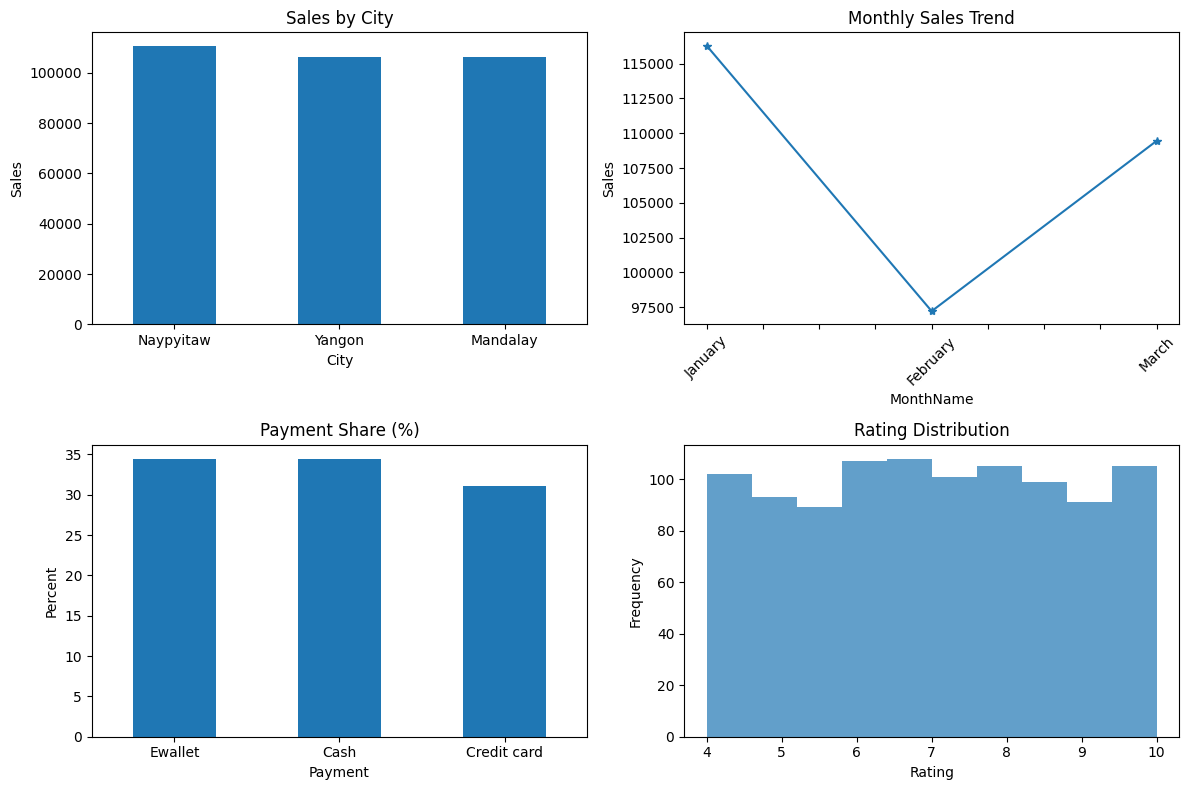

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# (1) Sales by City
city_sales.plot(kind="bar", ax=axes[0,0])
axes[0,0].set_title("Sales by City")
axes[0,0].set_ylabel("Sales")
axes[0,0].tick_params(axis="x", rotation=0)

# (2) Monthly Sales Trend
monthly_sales.plot(kind="line", marker="*", ax=axes[0,1])
axes[0,1].set_title("Monthly Sales Trend")
axes[0,1].set_ylabel("Sales")
axes[0,1].tick_params(axis="x", rotation=45)

# (3) Payment Distribution (Bar; robust across backends)
(payment_share*100).plot(kind="bar", ax=axes[1,0])
axes[1,0].set_title("Payment Share (%)")
axes[1,0].set_ylabel("Percent")
axes[1,0].tick_params(axis="x", rotation=0)

# (4) Rating Distribution (Histogram)
rating_series.plot(kind="hist", bins=10, ax=axes[1,1], alpha=0.7)
axes[1,1].set_title("Rating Distribution")
axes[1,1].set_xlabel("Rating")

plt.tight_layout()
plt.savefig("dashboard_summary2.png", dpi=150, bbox_inches="tight")
plt.show()

### ***5. Export small summary tables (for README badges/charts)***

In [6]:
# Top 5 cities by sales
city_sales.head(5).to_csv("city_sales.csv")

# Top 5 product lines by sales
top_products = df.groupby("Product line")["Sales"].sum().sort_values(ascending=False).head(5)
top_products.to_csv("top_products.csv")

### ***Day 26 — Dashboard Building***

***Objective***
*- Create the first version of the dashboard from the final dataset.*

***Steps Done***

*- Used final_dataset.csv as the input.*

*- Built KPI tiles (Total Sales, Avg Rating, Gross Income).*

*- Visualized Sales by City, Sales by Month, Payment distribution, and Rating distribution.*

*- Exported supporting CSVs (city_sales.csv, top_products.csv) and final dashboard image.*

***Sanity Checks***

*- KPIs match manual aggregations from the dataset.*

*- City and Payment breakdowns align with raw counts.*

*- No missing values in plots.*

***Next (Day 27)***
*Refine the dashboard: improve visuals, add interactivity, and prepare a polished portfolio-ready version*